In [10]:
from qiskit import *

In [11]:
# dir()

In [12]:
# create a single qubit circuit, the default initial state will be |0>
qc = QuantumCircuit(1)

In [13]:
# Apply Pauli-X to achieve |1>
qc.x(0)

In [14]:
# Apply Hadamard to achieve superposition
qc.h(0)

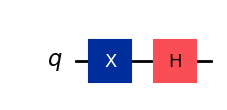

In [15]:
# Draw with MatplotLib drawer ('mpl')
qc.draw('mpl')

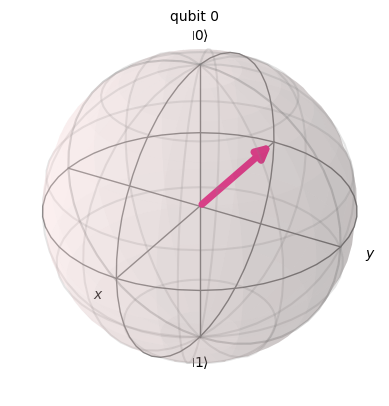

In [16]:
from qiskit.primitives import Estimator, Sampler
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector, visualize_transition

# Run the simulation
simulator = StatevectorSimulator()
job = simulator.run([qc])
result = job.result()

dir(result)

# extract the statevector
# statevector = result.quasi_dists[0].get_statevector()
statevector = result.get_statevector()

# Plot with Bloch multivector
plot_bloch_multivector(statevector)

In [17]:
# visualize_transition(qc)

In [18]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram


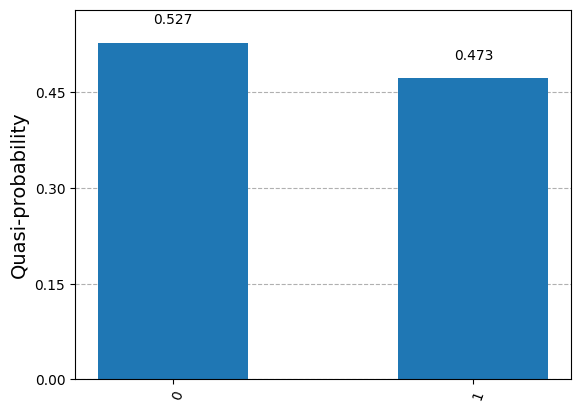

In [19]:

qc.measure_all()

#run the sampler
sampler = Sampler()
job = sampler.run([qc], shots=1024)
result = job.result()
# Access the counts through the quasi_dists attribute
# This returns a dictionary with bitstring integers as keys
quasi_dist = result.quasi_dists[0]

# Convert to the format expected by plot_histogram
# The keys need to be binary strings
counts_dict = {format(int(k), f'0{qc.num_clbits}b'): v * result.metadata[0].get('shots', 1024) 
               for k, v in quasi_dist.items()}

# Plot the histogram
plot_histogram(counts_dict)
